In [1]:
import os
from nltk.parse import stanford
import nltk
os.environ['STANFORD_PARSER'] = '/home/shanu/nltk/jars/stanford-parser.jar'
os.environ['STANFORD_MODELS'] = '/home/shanu/nltk/jars/stanford-parser-3.7.0-models.jar'

In [2]:
# # Parse Tree
# parser = stanford.StanfordParser(model_path="/home/shanu/nltk/jars/englishPCFG.ser.gz")
# list(parser.raw_parse("the quick brown fox jumps over the lazy dog"))

In [3]:
# Dependency Tree
from nltk.parse.stanford import StanfordDependencyParser
dep_parser=StanfordDependencyParser(model_path="/home/shanu/nltk/jars/englishPCFG.ser.gz")

In [4]:
def lca(tree, index1, index2):
    node = index1
    path1 = []
    path2 = []
    path1.append(index1)
    path2.append(index2)
    while(node != tree.root):
        node = tree.nodes[node['head']]
        path1.append(node)
    node = index2
    while(node != tree.root):
        node = tree.nodes[node['head']]
        path2.append(node)
    for l1, l2 in zip(path1[::-1],path2[::-1]):
        if(l1==l2):
            temp = l1
    return temp

In [5]:
def path_lca(tree, node, lca_node):
    path = []
    path.append(node)
    while(node != lca_node):
        node = tree.nodes[node['head']]
        path.append(node)
    return path

In [6]:
import _pickle 
f = open('data/training_data', 'rb')
sentences, e1, e2 = _pickle.load(f)
f.close()

In [ ]:
sentences[2608]= "This strawberry sauce has about a million uses , is freezer-friendly , and is so much better than that jar of Smuckers strawberry sauce that you 've had sitting in your fridge since that time you made banana splits 1.5 years ago ."

In [38]:
from nltk.tokenize.stanford import StanfordTokenizer
path_to_jar = "/home/shanu/nltk/jars/stanford-postagger.jar"
tokenizer=StanfordTokenizer(path_to_jar)

In [39]:
tokenizer.tokenize(sentences[1303])

['The',
 'horizontal',
 'branch',
 'is',
 'a',
 'part',
 'of',
 'the',
 'Hertzsprung',
 '-',
 'Russell',
 '-LRB-',
 'H-R',
 '-RRB-',
 'diagram',
 'that',
 'represents',
 'stars',
 'that',
 'burn',
 'helium',
 'in',
 'thier',
 'cores',
 '.']

In [25]:
i=1303
sentences[i], e1[i], e2[i]

('The horizontal branch is a part of the Hertzsprung -Russell ( H-R ) diagram that represents stars that burn helium in thier cores .',
 2,
 13)

In [26]:
tokenized_line = nltk.word_tokenize(sentences[i])
for j, word in enumerate(tokenized_line):
    print(j, word)

0 The
1 horizontal
2 branch
3 is
4 a
5 part
6 of
7 the
8 Hertzsprung
9 -Russell
10 (
11 H-R
12 )
13 diagram
14 that
15 represents
16 stars
17 that
18 burn
19 helium
20 in
21 thier
22 cores
23 .


In [27]:
 parse_tree = dep_parser.raw_parse(sentences[i])
for trees in parse_tree:
    tree = trees
    t = trees.tree()

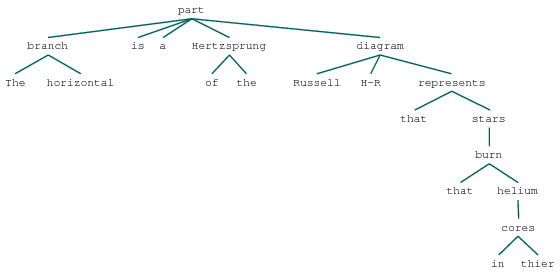

In [28]:
t

In [29]:
print(tree)

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x7f0633443bf8>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': defaultdict(<class 'list'>, {'root': [6]}),
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': 'DT',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '_',
                 'head': 3,
                 'lemma': '_',
                 'rel': 'det',
                 'tag': 'DT',
                 'word': 'The'},
             2: {'address': 2,
                 'ctag': 'JJ',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '_',
                 'head': 3,
                 'lemma': '_',
                 'rel': 'amod',
                 'tag': 'JJ',
                 'w

In [ ]:
a = w

In [59]:
word_path1 = []
word_path2 = []
rel_path1 = []
rel_path2 = []
pos_path1 = []
pos_path2 = []
for i in range(8000):
    word_path1.append(0)
    word_path2.append(0)
    rel_path1.append(0)
    rel_path2.append(0)
    pos_path1.append(0)
    pos_path2.append(0)

In [60]:
len(word_path1)

8000

In [ ]:
for i in range(8000):
    try:
        parse_tree = dep_parser.raw_parse(sentences[i])
        for trees in parse_tree:
            tree = trees
        node1 = tree.nodes[e1[i]+1]
        node2 = tree.nodes[e2[i]+1]
        if node1['address']!=None and node2['address']!=None:
            print(i, "success")
            lca_node = lca(tree, node1, node2)
            path1 = path_lca(tree, node1, lca_node)
            path2 = path_lca(tree, node2, lca_node)

            word_path1[i] = [p["word"] for p in path1]
            word_path2[i] = [p["word"] for p in path2]
            rel_path1[i] = [p["rel"] for p in path1]
            rel_path2[i] = [p["rel"] for p in path2]
            pos_path1[i] = [p["tag"] for p in path1]
            pos_path2[i] = [p["tag"] for p in path2]
        else:
            print(i, node1["address"], node2["address"])
    except AssertionError:
        print(i, "error")
    

In [ ]:
1303, 1743, 2222, 2607

In [62]:
i = 2608

In [63]:
sentences[i]

"This strawberry sauce has about a million uses , is freezer-friendly , and is so much better than that jar of Smuckers strawberry sauce that you 've had sitting in your fridge since that time you made banana splits 1 1/2 years ago ."

In [64]:
try:
    parse_tree = dep_parser.raw_parse(sentences[i])
except AssertionError:
    print("error")

error


In [48]:
for trees in parse_tree:
    tree = trees
node1 = tree.nodes[e1[i]+1]
node2 = tree.nodes[e2[i]+1]
if node1['address']!=None and node2['address']!=None:
    print(i, "success")
    lca_node = lca(tree, node1, node2)
    path1 = path_lca(tree, node1, lca_node)
    path2 = path_lca(tree, node2, lca_node)

    word_path1.append([p["word"] for p in path1])
    word_path2.append([p["word"] for p in path2])
    rel_path1.append([p["rel"] for p in path1])
    rel_path2.append([p["rel"] for p in path2])
    pos_path1.append([p["tag"] for p in path1])
    pos_path2.append([p["tag"] for p in path2])
else:
    print(i)

AssertionError: 

In [41]:
sentences[219]

'Governments , frightened of losing votes , resolved the crisis through subsidization .'

In [695]:
t = dep_parser.raw_parse(sentences[0])
for i in t:
    tree = i

In [696]:
sentences[0]

'The system as described above has its greatest application in an arrayed  configuration  of antenna  elements .'

In [697]:
tree.root

{'address': 6,
 'ctag': 'VBZ',
 'deps': defaultdict(list, {'dobj': [9], 'nsubj': [2]}),
 'feats': '_',
 'head': 0,
 'lemma': '_',
 'rel': 'root',
 'tag': 'VBZ',
 'word': 'has'}

In [702]:
e1[i]

TypeError: list indices must be integers or slices, not DependencyGraph

In [700]:
node1 = tree.nodes[e1[i][0]]
node2 = tree.nodes[e2[0][0]]

TypeError: list indices must be integers or slices, not DependencyGraph

In [679]:
lca_node = lca(tree, node1, node2)
path1 = path_lca(tree, node1, lca_node)
path2 = path_lca(tree, node2, lca_node)

word_path1.append([p["word"] for p in path1])
word_path2.append([p["word"] for p in path2])
rel_path1.append([p["rel"] for p in path1])
rel_path2.append([p["rel"] for p in path2])
pos_path1.append([p["tag"] for p in path1])
pos_path2.append([p["tag"] for p in path2])

AttributeError: 'Tree' object has no attribute 'nodes'

In [601]:
sent = "The factory 's products have included flower pots , Finnish rooster-whistles , pans , trays , tea pots , ash trays and air moisturisers ."

In [653]:
i = 0
sent = sentences[i]

In [687]:
sent

'The system as described above has its greatest application in an arrayed  configuration  of antenna  elements .'

In [688]:
t = dep_parser.raw_parse(sent)
for i in t:
    a = i
    trees = i.tree()

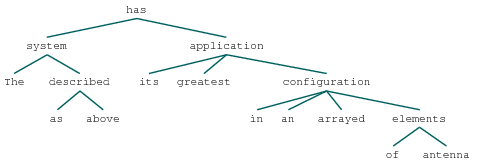

In [689]:
trees

In [691]:
for i in a.nodes:
    print(a.nodes[i]['word'], i)

None 0
The 1
system 2
as 3
described 4
above 5
has 6
its 7
greatest 8
application 9
in 10
an 11
arrayed 12
configuration 13
of 14
antenna 15
elements 16


In [658]:
print(a)

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x7f61554197b8>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': defaultdict(<class 'list'>, {'root': [6]}),
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': 'DT',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '_',
                 'head': 2,
                 'lemma': '_',
                 'rel': 'det',
                 'tag': 'DT',
                 'word': 'The'},
             2: {'address': 2,
                 'ctag': 'NN',
                 'deps': defaultdict(<class 'list'>, {'det': [1], 'dep': [4]}),
                 'feats': '_',
                 'head': 6,
                 'lemma': '_',
                 'rel': 'nsubj',
                 'tag': 'N

In [659]:
tree = a
node1 = tree.nodes[e1[i][0]]
node2 = tree.nodes[e2[i][0]]

In [660]:
lca_node = lca(tree, node1, node2)

In [661]:
lca_node = lca(tree, node1, node2)
path1 = path_lca(tree, node1, lca_node)
path2 = path_lca(tree, node2, lca_node)

In [663]:
path1

[{'address': 1,
  'ctag': 'DT',
  'deps': defaultdict(list, {}),
  'feats': '_',
  'head': 2,
  'lemma': '_',
  'rel': 'det',
  'tag': 'DT',
  'word': 'The'},
 {'address': 2,
  'ctag': 'NN',
  'deps': defaultdict(list, {'dep': [4], 'det': [1]}),
  'feats': '_',
  'head': 6,
  'lemma': '_',
  'rel': 'nsubj',
  'tag': 'NN',
  'word': 'system'},
 {'address': 6,
  'ctag': 'VBZ',
  'deps': defaultdict(list, {'dobj': [9], 'nsubj': [2]}),
  'feats': '_',
  'head': 0,
  'lemma': '_',
  'rel': 'root',
  'tag': 'VBZ',
  'word': 'has'}]

In [664]:
path2

[{'address': 7,
  'ctag': 'PRP$',
  'deps': defaultdict(list, {}),
  'feats': '_',
  'head': 9,
  'lemma': '_',
  'rel': 'nmod:poss',
  'tag': 'PRP$',
  'word': 'its'},
 {'address': 9,
  'ctag': 'NN',
  'deps': defaultdict(list, {'amod': [8], 'nmod': [13], 'nmod:poss': [7]}),
  'feats': '_',
  'head': 6,
  'lemma': '_',
  'rel': 'dobj',
  'tag': 'NN',
  'word': 'application'},
 {'address': 6,
  'ctag': 'VBZ',
  'deps': defaultdict(list, {'dobj': [9], 'nsubj': [2]}),
  'feats': '_',
  'head': 0,
  'lemma': '_',
  'rel': 'root',
  'tag': 'VBZ',
  'word': 'has'}]

In [665]:
word_path1 = [p["word"] for p in path1]
word_path2 = [p["word"] for p in path2]
rel_path1 = [p["rel"] for p in path1]
rel_path2 = [p["rel"] for p in path2]
pos_path1 = [p["tag"] for p in path1]
pos_path2 = [p["tag"] for p in path2]

In [666]:
word_path1, rel_path1, pos_path1

(['The', 'system', 'has'], ['det', 'nsubj', 'root'], ['DT', 'NN', 'VBZ'])

In [667]:
rel_path2

['nmod:poss', 'dobj', 'root']

In [66]:
t = dep_parser.raw_parse(sent)

In [67]:
a = []
for p in t:
    for i in range(10):
        a.append(p._tree(i))

In [68]:
a

[Tree(None, [Tree('submitted', [Tree('Dependencies', [Tree('Bills', ['for', Tree('ports', ['on', 'and', 'immigration'])])]), 'were', Tree('Brownback', ['by', 'Senator', Tree('Republican', [Tree('Kansas', ['of'])])])])]),
 Tree('Dependencies', [Tree('Bills', ['for', Tree('ports', ['on', 'and', 'immigration'])])]),
 'for',
 Tree('Bills', ['for', Tree('ports', ['on', 'and', 'immigration'])]),
 'on',
 Tree('ports', ['on', 'and', 'immigration']),
 'and',
 'immigration',
 'were',
 Tree('submitted', [Tree('Dependencies', [Tree('Bills', ['for', Tree('ports', ['on', 'and', 'immigration'])])]), 'were', Tree('Brownback', ['by', 'Senator', Tree('Republican', [Tree('Kansas', ['of'])])])])]

In [98]:
for p in t:
    print(p.tree())

(submitted
  (Bills (ports on and immigration))
  were
  (Brownback by Senator (Republican (Kansas of))))


In [99]:
print ([parse.tree() for parse in dep_parser.raw_parse(sent)])

[Tree('submitted', [Tree('Bills', [Tree('ports', ['on', 'and', 'immigration'])]), 'were', Tree('Brownback', ['by', 'Senator', Tree('Republican', [Tree('Kansas', ['of'])])])])]


In [76]:
[list(parse.triples()) for parse in dep_parser.raw_parse(sent)]

[[(('submitted', 'VBN'), 'nsubjpass', ('Bills', 'NNS')),
  (('Bills', 'NNS'), 'nmod', ('ports', 'NNS')),
  (('ports', 'NNS'), 'case', ('on', 'IN')),
  (('ports', 'NNS'), 'cc', ('and', 'CC')),
  (('ports', 'NNS'), 'conj', ('immigration', 'NN')),
  (('submitted', 'VBN'), 'auxpass', ('were', 'VBD')),
  (('submitted', 'VBN'), 'nmod', ('Brownback', 'NNP')),
  (('Brownback', 'NNP'), 'case', ('by', 'IN')),
  (('Brownback', 'NNP'), 'compound', ('Senator', 'NNP')),
  (('Brownback', 'NNP'), 'appos', ('Republican', 'NNP')),
  (('Republican', 'NNP'), 'nmod', ('Kansas', 'NNP')),
  (('Kansas', 'NNP'), 'case', ('of', 'IN'))]]

In [11]:
# POS TAGGER
from nltk.tag.stanford import StanfordPOSTagger
path_to_model = "/home/shanu/nltk/jars/english-bidirectional-distsim.tagger"
path_to_jar = "/home/shanu/nltk/jars/stanford-postagger.jar"
tagger=StanfordPOSTagger(path_to_model, path_to_jar)

In [529]:
sentence = 'The quick brown fox jumps over the lazy dog'
pos = tagger.tag(sent.split())

In [530]:
pos[0][1]

'NNS'

In [531]:
pos

[('Bills', 'NNS'),
 ('on', 'IN'),
 ('ports', 'NNS'),
 ('and', 'CC'),
 ('immigration', 'NN'),
 ('were', 'VBD'),
 ('submitted', 'VBN'),
 ('by', 'IN'),
 ('Senator', 'NNP'),
 ('Brownback,', 'NNP'),
 ('Republican', 'NNP'),
 ('of', 'IN'),
 ('Kansas', 'NNP')]